In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_train = pd.read_csv('../data/train.csv', na_filter=False)
data_test = pd.read_csv('../data/test.csv', na_filter=False)

data_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
391,392,1,3,"Jansson, Mr. Carl Olof",male,21,0,0,350034,7.7958,,S
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38,1,5,347077,31.3875,,S
325,326,1,1,"Young, Miss. Marie Grice",female,36,0,0,PC 17760,135.6333,C32,C
397,398,0,2,"McKane, Mr. Peter David",male,46,0,0,28403,26.0000,,S
657,658,0,3,"Bourke, Mrs. John (Catherine)",female,32,1,1,364849,15.5000,,Q
59,60,0,3,"Goodwin, Master. William Frederick",male,11,5,2,CA 2144,46.9000,,S
636,637,0,3,"Leinonen, Mr. Antti Gustaf",male,32,0,0,STON/O 2. 3101292,7.9250,,S
662,663,0,1,"Colley, Mr. Edward Pomeroy",male,47,0,0,5727,25.5875,E58,S
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35,1,0,19943,90.0000,C93,S


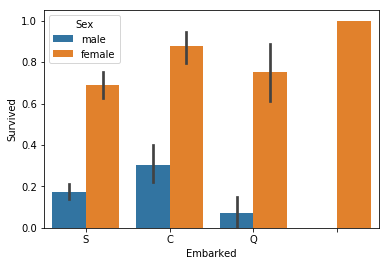

In [68]:
sns.barplot(x='Embarked', y='Survived', hue='Sex',  data=data_train)

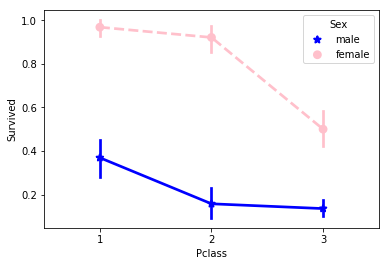

In [69]:
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=data_train, palette={'male': 'blue', 'female': 'pink'}, markers=['*', 'o'], linestyles=['-', '--'])

In [70]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5).replace('', -0.5)
    df.Age = df.Age.astype(float)

    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N').replace('', 'N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5).replace('', -0.5)
    df.Fare = df.Fare.astype(float)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    
    
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(data_train)
data_test = transform_features(data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


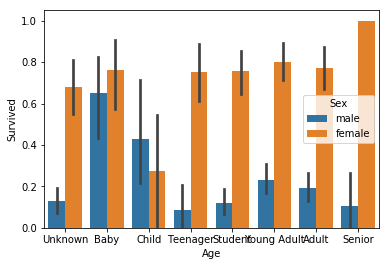

In [71]:
sns.barplot(x="Age", y="Survived", hue="Sex", data=data_train);

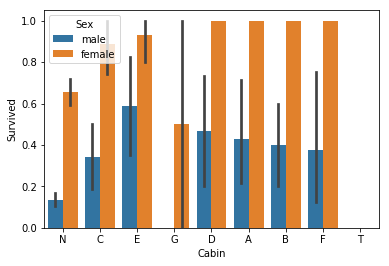

In [72]:
sns.barplot(x="Cabin", y="Survived", hue="Sex", data=data_train);

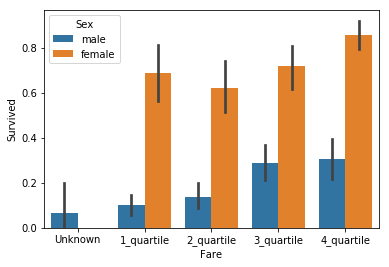

In [73]:
sns.barplot(x="Fare", y="Survived", hue="Sex", data=data_train);

In [74]:
from sklearn import preprocessing

def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test

data_train, data_test = encode_features(data_train, data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19


In [75]:
from sklearn.model_selection import train_test_split

X_all = data_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = data_train['Survived']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

parameters = {
    'n_estimators': [9, 50, 100, 200],
    'max_features': ['log2', 'sqrt', 'auto'],
    'max_depth': [2, 4, 8],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 5, 8]
}

acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

clf = grid_obj.best_estimator_

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [77]:
predicitions = clf.predict(X_test)
print(accuracy_score(y_test, predicitions))

0.8379888268156425


In [78]:
from sklearn.cross_validation import KFold

def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        clf.fit(X_train, y_train)
        predicitions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predicitions)
        outcomes.append(accuracy)
        print(f"Fold {fold} accuracy:{accuracy}")
    
    mean_outcome = np.mean(outcomes)
    print(f"Mean Accuracy: {mean_outcome}")

run_kfold(clf)

Fold 1 accuracy:0.8
Fold 2 accuracy:0.8876404494382022
Fold 3 accuracy:0.797752808988764
Fold 4 accuracy:0.8651685393258427
Fold 5 accuracy:0.8539325842696629
Fold 6 accuracy:0.8314606741573034
Fold 7 accuracy:0.7752808988764045
Fold 8 accuracy:0.8089887640449438
Fold 9 accuracy:0.8764044943820225
Fold 10 accuracy:0.8089887640449438
Mean Accuracy: 0.830561797752809


In [81]:
ids = data_test['PassengerId']
predicitions = clf.predict(data_test.drop('PassengerId', axis=1))

output = pd.DataFrame({'PassengerId': ids, 'Survived': predicitions })

output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
